## 3. PyCBC Tutorial: Generating Waveforms and Matched Filtering

We will be using the [PyCBC](http://github.com/ligo-cbc/pycbc) library, which is used to study gravitational-wave data, find astrophysical sources due to compact binary mergers, and study their parameters. These are some of the same tools that the LIGO and Virgo collaborations use to find gravitational waves in LIGO/Virgo data 

In this tutorial we will walk through how find a specific signal in LIGO data. We present how to generate the waveform of a gravitational-wave merger and matched filtering, which is optimal in the case of Gaussian noise and a known signal model. In reality our noise is not entirely Guassian, and in practice we use a variety of techniques to separate signals from noise in addition to the use of the matched filter. 

Additional [examples](http://pycbc.org/pycbc/latest/html/#library-examples-and-interactive-tutorials) and module level documentation are [here](http://pycbc.org/pycbc/latest/html/py-modindex.html)

#### Getting the software environment setup

PyCBC is installable through pip, but also relies on portions of the [LALSuite](https://git.ligo.org/lscsoft/lalsuite) c-library. A bundled version of this suitable for use with PyCBC is also available on Mac / Linux through pip. These can be installed as follows within the notebook.

In [1]:
import sys
!{sys.executable} -m pip install pycbc ligo-common --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.0 MB 3.9 MB/s 
     |████████████████████████████████| 45 kB 11.6 MB/s 
     |████████████████████████████████| 48.3 MB 5.9 MB/s 
     |████████████████████████████████| 7.3 MB 15.1 MB/s 
     |████████████████████████████████| 78 kB 45.6 MB/s 
     |████████████████████████████████| 201 kB 47.3 MB/s 
     |████████████████████████████████| 1.4 MB 43.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 51 kB 50.1 MB/s 
     |████████████████████████████████| 45 kB 35.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 55 kB 50.4 MB/s 
     |████████████████████████████████| 295 kB 49.0 MB/s 
     |███████████

### Generate your first waveform !

Here we'll generate the gravitational waveform using one of the available waveform approximants. These can be generated as a time series using [`get_td_waveform`](http://pycbc.org/pycbc/latest/html/pycbc.waveform.html#pycbc.waveform.waveform.get_td_waveform). There are some additional examples using this interface [here](http://pycbc.org/pycbc/latest/html/waveform.html). The key parameters are the masses of the binary (given in solar masses), the time between samples (in seconds), the starting gravitational-wave frequency (Hz) and the name of the approximant we'd like to generate. A variety of approximants are available that include different physical effects. A full review of the different models is outside of the scope of this tutorial.

In this example, we've chosen to use the 'SEOBNRv4_opt' model. There are many others available as well with different methodologies and which include different physical effects. This is an implementation of the model introduced [in this paper](https://arxiv.org/pdf/1611.03703.pdf). It models the gravitational waveform of inspiralling and merging black holes, and includes the ability for each black hole to spin in the same direction as the orbit (aligned spin).

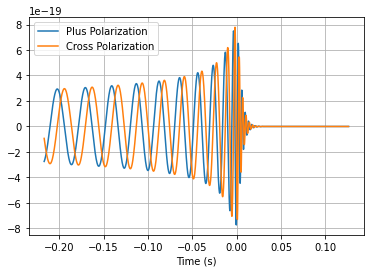

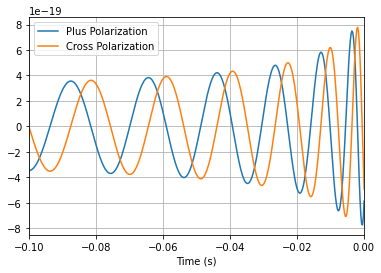

In [2]:
%matplotlib inline
import pandas as pd

from pycbc.waveform import get_td_waveform
import pylab
# pylab.close('all')

# The output of this function are the "plus" and "cross" polarizations of the gravitational-wave signal 
# as viewed from the line of sight at a given source inclination (assumed face-on if not provided)
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=30.6,
                         mass2=35.6,
                         delta_t=1.0/4096,
                         f_lower=30)

pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.grid()
pylab.show()

# Zoom in near the merger time#
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.xlim(-.1, 0)
pylab.legend()
pylab.grid()
pylab.show()

In [3]:
hc.data == 5.323423983941786e-19

array([False, False, False, ..., False, False, False])

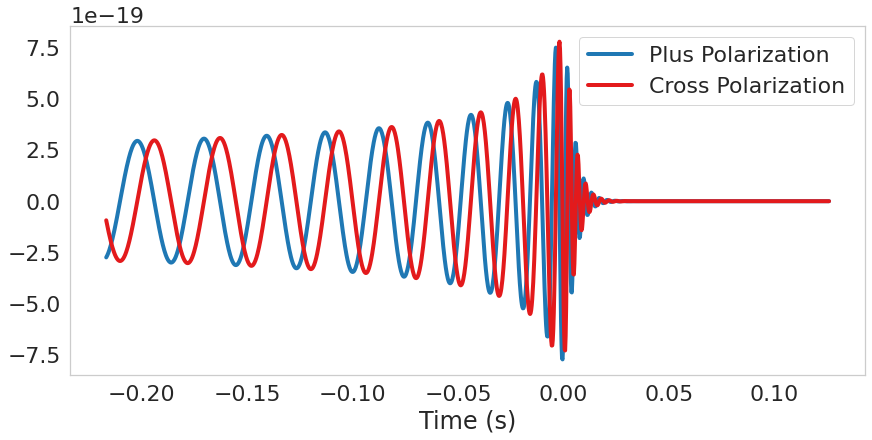

In [19]:
sns.set_style("whitegrid")
sns.set_context('notebook', font_scale=2, rc={"lines.linewidth": 4})

fig, ax = plt.subplots(1, 1, constrained_layout=True)
fig.set_figheight(6)
fig.set_figwidth(15)
pylab.plot(hp.sample_times[:1543], hp[:1543], label='Plus Polarization', color=sns.color_palette("Paired")[1])
pylab.plot(hp.sample_times[:1543], hc[:1543], label='Cross Polarization',  color=sns.color_palette("Paired")[5])
pylab.xlabel('Time (s)')
# pylab.xlim(-.1, 0)
pylab.legend()
pylab.grid()
pylab.show()

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
sns.set()

In [ ]:
plt.close('all') 

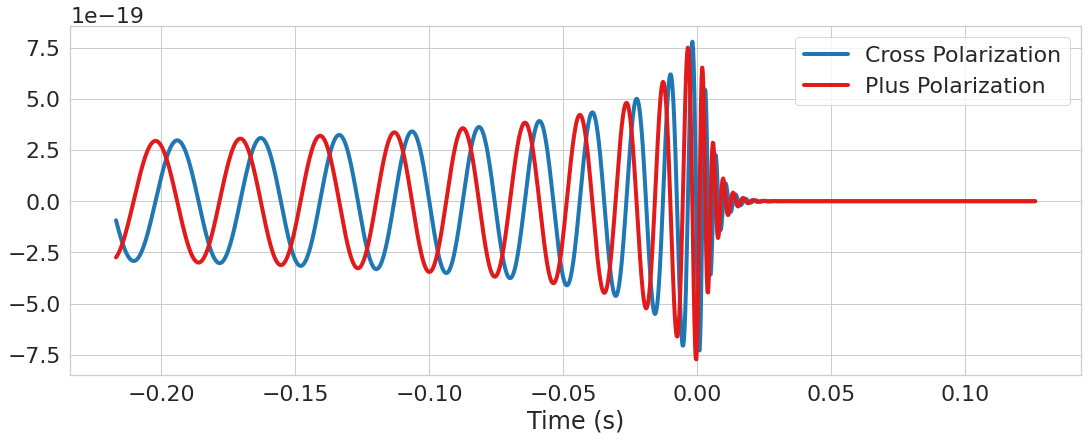

In [24]:
sns.set_style("whitegrid")

sns.set_context('notebook', font_scale=2, rc={"lines.linewidth": 4})

fig, ax = plt.subplots(1, 1, constrained_layout=True)
fig.set_figheight(6)
fig.set_figwidth(15)
sns.lineplot(x=hc.sample_times.data, y=hc.data, label='Cross Polarization', color=sns.color_palette("Paired")[1])
sns.lineplot(x=hp.sample_times.data, y=hp.data, label='Plus Polarization', color=sns.color_palette("Paired")[5])
pylab.xlabel('Time (s)')
# pylab.xlim(-.1, 0)
plt.savefig('W.png')
plt.show()

In [ ]:
len(hc.data)

In [ ]:
import numpy as np

In [ ]:
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=30.6,
                         mass2=35.6,
                         delta_t=1.0/4096,
                         f_lower=30)
    
times = np.array(hc.sample_times)
wanted_index = np.where((times>=-0.1) & (times<=0))

times = times[wanted_index]
values = np.array(hc[wanted_index])

In [ ]:
plt.plot(values)

In [ ]:
import numpy as np
import pandas as pd

min_mass, max_mass = 20.0, 40.0

values_list = []
times_list = []
mass1_list = []
mass2_list = []

for m1 in np.arange(min_mass, max_mass, 0.05):
  for m2 in np.arange(m1, max_mass, 0.05):
    m1 = round(m1, 2)
    m2 = round(m2, 2)

    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m1,
                         mass2=m2,
                         delta_t=1.0/4096,
                         f_lower=30)
    
    times = np.array(hc.sample_times)
    wanted_index = np.where((times>=-0.1) & (times<=0))

    times = times[wanted_index]
    values = np.array(hp[wanted_index])

    m1_arr, m2_arr = np.empty(times.size), np.empty(times.size)
    m1_arr.fill(m1)
    m2_arr.fill(m2)

    mass1_list = mass1_list + list(m1_arr)
    mass2_list = mass2_list + list(m2_arr)
    times_list = times_list + list(times)
    values_list = values_list + list(values)

df = pd.DataFrame({'mass1':mass1_list, 'mass2': mass2_list, 'time': times_list, 'value': values_list})

In [ ]:
df.to_parquet('pycbc_database_20_40.parquet')

In [ ]:
import numpy as np
import pandas as pd

min_mass, max_mass = 30.0, 40.0

values_list = []
times_list = []
mass1_list = []
mass2_list = []

for m1 in np.arange(min_mass, max_mass + 0.05, 0.05):
  for m2 in np.arange(m1, max_mass + 0.05, 0.05):
    m1 = round(m1, 2)
    m2 = round(m2, 2)

    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m1,
                         mass2=m2,
                         delta_t=1.0/4096,
                         f_lower=30)
    
    times = np.array(hp.sample_times)
    wanted_index = np.where((times>=-0.1) & (times<=0))

    times = times[wanted_index]
    values = np.array(hp[wanted_index])
    m1_arr, m2_arr = np.empty(times.size), np.empty(times.size)
    m1_arr.fill(m1)
    m2_arr.fill(m2)

    mass1_list = mass1_list + list(m1_arr)
    mass2_list = mass2_list + list(m2_arr)
    times_list = times_list + list(times)
    values_list = values_list + list(values)

df = pd.DataFrame({'mass1':mass1_list, 'mass2': mass2_list, 'time': times_list, 'value': values_list})

In [ ]:
df.to_parquet('pycbc_database_30_40.parquet')

In [ ]:
import numpy as np
import pandas as pd
min_mass = 2
max_mass = 4
for m1 in np.arange(min_mass, max_mass + 0.05, 0.05):
  for m2 in np.arange(m1, max_mass + 0.05, 0.05):
    print(round(m1), round(m2))